In [1]:
# Using Machine Learnign To Fuse Verbal Autopsy Narratives And Binary Features In The Analysis Of Deaths From Hyperglycaemia

In [2]:
# Importing the csv file
import csv
input_file= "symptoms_all.csv"
output_file="symptoms_all_variables.csv"
with open(input_file, 'r') as csvfile:
    with open(output_file, 'w', newline='') as f:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            need = [row[0], row[8],row[22],row[25],row[37],row[45],row[47],row[64],row[101], row[116], row[253], row[280]]
            len_need = len(need)
            for i in range(len_need):
                if need[i] == '':
                   need[i] = "0"
                elif need[i] == 'y':
                   need[i] = "1"
                else:
                   continue

            if need[0] == 'y':
               need[0] = "1"
            #print(need)



            thewriter = csv.writer(f)
            thewriter.writerow(need)
            #f.write("%s %s %s %s %s %s %s %s %s %s %s\n" %(need[8],need[22],need[25],need[37],need[45],need[47],need[64],need[101], need[116], need[248], need[279]))
    

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from patsy import dmatrices
import statsmodels.api as sm
from keras import models
from keras import layers
from keras.layers import Dense
from keras.models import Model
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Flatten
from nltk.corpus import stopwords
from sklearn import datasets, svm
from keras.models import Sequential
from keras.layers import Embedding
from pandas import Series, DataFrame
from keras.layers import MaxPooling1D
from gensim.models import KeyedVectors
from keras.utils import to_categorical
from sklearn.linear_model import SGDClassifier
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.nonparametric import smoothers_lowess
from keras.preprocessing.sequence import pad_sequences
from statsmodels.nonparametric.kde import KDEUnivariate
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import MultinomialNB

import re
import nltk
import gensim
import logging
import bs4 as bs
import urllib.request
import multiprocessing
import texthero as hero
from gensim import utils
from sklearn import utils
from hyperas import optim
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from nltk.corpus import stopwords
from texthero import stopwords
from imblearn import datasets
from nltk.stem import SnowballStemmer
from sklearn.metrics import accuracy_score
from hyperopt import Trials, STATUS_OK, tpe
from gensim.models.doc2vec import TaggedDocument
from hyperas.distributions import choice, uniform
from gensim.models.doc2vec import LabeledSentence
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize, word_tokenize
from imblearn.pipeline import make_pipeline
from sklearn.metrics import recall_score, roc_auc_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
dataset = pd.read_csv(output_file)
dataset

C:\Users\AHF\anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


,Id,female,tuber,diabetes,men_con,cough,ch_cough,diarr,exc_urine,exc_drink,disease_description,finaldiagnosis
0,100018,0,1,0,0,1,1,0,0,1,The deceased developed blisters under the righ...,0.0
1,100078,1,0,0,0,1,1,1,0,0,At first the deceased was complaining about br...,0.0
2,100096,1,1,0,0,1,1,0,0,1,She was complaining about hot feet with swelli...,0.0
3,100101,1,0,0,0,0,0,0,0,0,At first deceased complained headache and stom...,0.0
4,100108,0,0,0,1,0,0,0,0,1,Beginning of illness deceased dreamed eating f...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8693,631156,1,0,0,0,0,0,0,0,0,She started by complaining with headache and a...,0.0
8694,632743,0,0,0,0,0,0,0,0,0,0,0.0
8695,633179,1,0,0,0,0,0,0,0,0,The deceased started by having painful abdomen...,0.0
8696,633559,0,0,0,0,0,0,0,0,0,0,0.0


In [4]:
# Changing the target into integer
dataset.finaldiagnosis = dataset.finaldiagnosis.astype(int)
dataset

,Id,female,tuber,diabetes,men_con,cough,ch_cough,diarr,exc_urine,exc_drink,disease_description,finaldiagnosis
0,100018,0,1,0,0,1,1,0,0,1,The deceased developed blisters under the righ...,0
1,100078,1,0,0,0,1,1,1,0,0,At first the deceased was complaining about br...,0
2,100096,1,1,0,0,1,1,0,0,1,She was complaining about hot feet with swelli...,0
3,100101,1,0,0,0,0,0,0,0,0,At first deceased complained headache and stom...,0
4,100108,0,0,0,1,0,0,0,0,1,Beginning of illness deceased dreamed eating f...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8693,631156,1,0,0,0,0,0,0,0,0,She started by complaining with headache and a...,0
8694,632743,0,0,0,0,0,0,0,0,0,0,0
8695,633179,1,0,0,0,0,0,0,0,0,The deceased started by having painful abdomen...,0
8696,633559,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Dividing the dataset into binary and text features
dataset1 = dataset[['disease_description', 'finaldiagnosis']]
dataset2 = dataset[['female','tuber','diabetes','men_con','cough','ch_cough','diarr','exc_urine','exc_drink']]

,disease_description,finaldiagnosis
0,The deceased developed blisters under the righ...,0
1,At first the deceased was complaining about br...,0
2,She was complaining about hot feet with swelli...,0
3,At first deceased complained headache and stom...,0
4,Beginning of illness deceased dreamed eating f...,0
...,...,...
8693,She started by complaining with headache and a...,0
8694,0,0
8695,The deceased started by having painful abdomen...,0
8696,0,0


In [7]:
# Replacing Null values will NAN and NAN with -1
dataset21 = dataset2.replace("#NULL!",np.NAN)
dataset22 = dataset21.replace(np.NAN,-1)
dataset22

,female,tuber,diabetes,men_con,cough,ch_cough,diarr,exc_urine,exc_drink
0,0,1,0,0,1,1,0,0,1
1,1,0,0,0,1,1,1,0,0
2,1,1,0,0,1,1,0,0,1
3,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
8693,1,0,0,0,0,0,0,0,0
8694,0,0,0,0,0,0,0,0,0
8695,1,0,0,0,0,0,0,0,0
8696,0,0,0,0,0,0,0,0,0


In [10]:
# Text Cleaning
dataset11 = hero.clean(dataset1["disease_description"])

# Remove numbers in words
dataset12 = hero.remove_digits(dataset11, only_blocks = False)

# Removing the words 'sugar' and 'diabetes' from the text
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["sugar", "suger", "diabate", "diabetic", "diabete", "diabetes"]))
data3 = hero.remove_stopwords(dataset12, custom_stopwords)

# Remove numbers in from the text
data4 = hero.remove_digits(data3)

data5 = dataset1["finaldiagnosis"]
data6 = pd.DataFrame(data5)

datatrain = pd.concat([data4, data6], axis=1)
datatrain

,disease_description,finaldiagnosis
0,deceased developed blisters right breast via b...,0
1,first deceased complaining breast pain swollen...,0
2,complaining hot feet swelling also skip days d...,0
3,first deceased complained headache stomach cra...,0
4,beginning illness deceased dreamed eating food...,0
...,...,...
8693,started complaining headache abdominal pains a...,0
8694,,0
8695,deceased started painful abdomen following day...,0
8696,,0


In [11]:
# Tokenize text
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [12]:
# Adding tags to our documents
datatraintagged = datatrain.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['disease_description']), tags=[r.finaldiagnosis]), axis=1)

In [13]:
cores = multiprocessing.cpu_count()

In [14]:
# DBOW
# DBOW is the Doc2Vec model analogous to Skip-gram model in Word2Vec.

model_dbow = Doc2Vec(datatraintagged, dm=0, vector_size=50, negative=5, hs=0, min_count=2, sample = 0, workers=cores, epochs = 30)

# Save trained doc2vec model
model_dbow.save("test_doc2vec.model")

# Load saved doc2vec model
model_dbow = Doc2Vec.load("test_doc2vec.model")

## Print model vocabulary
model_dbow.wv.vocab

{'deceased': <gensim.models.keyedvectors.Vocab at 0x1fc555f3df0>,
 'developed': <gensim.models.keyedvectors.Vocab at 0x1fc555f3e50>,
 'blisters': <gensim.models.keyedvectors.Vocab at 0x1fc555f3eb0>,
 'right': <gensim.models.keyedvectors.Vocab at 0x1fc555f3f10>,
 'breast': <gensim.models.keyedvectors.Vocab at 0x1fc555f3f70>,
 'via': <gensim.models.keyedvectors.Vocab at 0x1fc555f3fd0>,
 'back': <gensim.models.keyedvectors.Vocab at 0x1fc55621070>,
 'consulted': <gensim.models.keyedvectors.Vocab at 0x1fc556210d0>,
 'traditional': <gensim.models.keyedvectors.Vocab at 0x1fc55621130>,
 'healer': <gensim.models.keyedvectors.Vocab at 0x1fc55621190>,
 'medicine': <gensim.models.keyedvectors.Vocab at 0x1fc556211f0>,
 'given': <gensim.models.keyedvectors.Vocab at 0x1fc55621250>,
 'get': <gensim.models.keyedvectors.Vocab at 0x1fc556212b0>,
 'better': <gensim.models.keyedvectors.Vocab at 0x1fc55621310>,
 'taken': <gensim.models.keyedvectors.Vocab at 0x1fc55621370>,
 'hospital': <gensim.models.keyedv

In [15]:
model_dmm = Doc2Vec(datatraintagged, dm=1, dm_mean=1, vector_size=50, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065, epochs = 30)

# Save trained doc2vec model
model_dmm.save("test_doc2vec.model")

## Load saved doc2vec model
model_dmm= Doc2Vec.load("test_doc2vec.model")

## Print model vocabulary
model_dmm.wv.vocab

{'deceased': <gensim.models.keyedvectors.Vocab at 0x1fc55518820>,
 'developed': <gensim.models.keyedvectors.Vocab at 0x1fc555187c0>,
 'blisters': <gensim.models.keyedvectors.Vocab at 0x1fc55518760>,
 'right': <gensim.models.keyedvectors.Vocab at 0x1fc55518700>,
 'breast': <gensim.models.keyedvectors.Vocab at 0x1fc555186a0>,
 'via': <gensim.models.keyedvectors.Vocab at 0x1fc55518640>,
 'back': <gensim.models.keyedvectors.Vocab at 0x1fc555185e0>,
 'consulted': <gensim.models.keyedvectors.Vocab at 0x1fc555185b0>,
 'traditional': <gensim.models.keyedvectors.Vocab at 0x1fc55518430>,
 'healer': <gensim.models.keyedvectors.Vocab at 0x1fc555184c0>,
 'medicine': <gensim.models.keyedvectors.Vocab at 0x1fc55518460>,
 'given': <gensim.models.keyedvectors.Vocab at 0x1fc55518310>,
 'get': <gensim.models.keyedvectors.Vocab at 0x1fc555183a0>,
 'better': <gensim.models.keyedvectors.Vocab at 0x1fc55518340>,
 'taken': <gensim.models.keyedvectors.Vocab at 0x1fc555182e0>,
 'hospital': <gensim.models.keyedv

In [16]:
# Deleting temporary training data to free up RAM.
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [17]:
# Concatenating the two models
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [18]:
# Buliding the final feature vector for the classifier
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [19]:
# Specifying feature and target vector for binary, text and combined features

# Text Features
y, x = vec_for_learning(new_model, datatraintagged)
x1 = pd.DataFrame(x)


# Binary Features
x2 = pd.DataFrame(dataset22)
y1 = pd.DataFrame(datatrain.finaldiagnosis)

# Combined Features
dataset3 = pd.concat([x1, x2], axis = 1)

(array([-4.09936905e-02, -3.48061383e-01,  1.22232988e-01,  6.40543699e-02,
        -2.55406499e-01, -5.33767045e-03,  5.30647516e-01, -3.86906266e-01,
        -3.26001525e-01,  1.92708775e-01, -5.78017890e-01,  3.86361480e-01,
        -5.94850965e-02,  2.00529739e-01,  5.67582071e-01, -3.74055773e-01,
        -1.30608410e-01, -1.19240485e-01, -9.91244838e-02,  9.30250064e-03,
        -3.27602699e-02,  2.06338778e-01,  2.97294497e-01,  1.08904302e-01,
        -5.91515720e-01,  1.77019253e-01, -3.07780188e-02,  1.52540490e-01,
         5.55146970e-02, -8.53446126e-01,  5.16775213e-02, -4.51553941e-01,
        -4.21223015e-01,  3.28592919e-02, -4.58537102e-01, -3.91368181e-01,
         1.26378939e-01, -1.19569397e+00, -2.96538949e-01, -5.91967888e-02,
         5.30515373e-01,  4.24774624e-02,  3.70420724e-01, -1.27985418e-01,
        -9.78327274e-01, -1.19265521e+00, -7.33525097e-01,  5.51948607e-01,
         5.69938064e-01, -5.75107872e-01, -1.98288453e+00,  1.29928589e+00,
         2.5

In [24]:
dataset4 = x1
dataset4

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.040994,-0.348061,0.122233,0.064054,-0.255406,-0.005338,0.530648,-0.386906,-0.326002,0.192709,...,-1.755269,1.849853,-1.314787,0.277505,-1.379309,-2.534861,-1.871546,0.942716,0.575023,0.910912
1,-0.081385,-0.015098,-0.051371,0.007126,0.025173,0.034594,0.146709,-0.093227,-0.229076,0.051270,...,1.342349,1.579946,-3.821810,0.085719,-0.205403,-4.148031,-2.470340,0.504659,1.490540,2.505223
2,-0.183812,-0.554158,0.151017,0.131311,-0.249561,0.013698,0.593552,-0.449011,-0.392326,0.267954,...,-0.371976,1.809361,-2.193452,1.121686,-2.543896,-4.413454,0.141348,2.965657,-0.957891,-1.395593
3,-0.056029,-0.042229,0.011745,0.029080,-0.149281,0.038893,0.555672,-0.396743,-0.276553,0.121093,...,0.559301,-1.385873,-0.534651,1.942505,-2.209504,-1.666671,-1.155998,2.396924,2.296723,-0.693173
4,-0.170734,-0.594518,0.164013,0.117361,-0.118577,0.024303,0.357550,-0.249089,-0.051529,0.019322,...,0.174507,-0.259269,-0.948271,2.757876,-1.313887,-1.213266,0.254465,-0.640450,-1.604754,-0.249474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8693,0.222681,0.086620,0.103563,-0.073000,0.129001,0.090280,0.126952,-0.074150,-0.371844,0.054050,...,-3.506076,0.023575,-4.828948,-2.122535,-2.928992,-2.290639,-1.801891,1.057499,-1.503268,0.257832
8694,0.000976,0.004304,0.002055,0.000898,-0.001527,0.002918,-0.001248,0.007835,0.009273,-0.002331,...,-0.002810,-0.001259,0.003953,-0.008795,0.003335,0.003413,-0.005792,-0.007421,-0.003691,-0.002726
8695,0.142469,-0.023029,0.094805,-0.022015,-0.150152,-0.050311,0.066196,-0.069128,-0.416759,0.117425,...,0.776786,-0.433237,-3.920896,-1.497741,-2.321660,-0.565105,-0.407281,0.143411,-0.825564,0.800753
8696,0.000976,0.004304,0.002055,0.000898,-0.001527,0.002918,-0.001248,0.007835,0.009273,-0.002331,...,-0.002810,-0.001259,0.003953,-0.008795,0.003335,0.003413,-0.005792,-0.007421,-0.003691,-0.002726


In [26]:
# Splitting data into train and test sets
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)
x1_train, x1_test, y1_train, y1_test = train_test_split(dataset2, y1, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(dataset3, y1, random_state=42)
x3_train, x3_test, y3_train, y3_test = train_test_split(dataset4, y1, random_state=42)

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [27]:
# Let's make SMOTE-ing part of our cross validation
# Manual upsampling within folds

# 1. Random Forest
# Binary

kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)
x1_train, x1_test, y1_train, y1_test = train_test_split(dataset2, y1, random_state=42)
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
example_params = {'n_estimators': 100, 'max_depth': 5, 'random_state': 13}
params = {'n_estimators': [50, 100, 200], 'max_depth': [4, 6, 10, 12], 'random_state': [13]}

def score_model(model, params, cv=None):
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTETomek(random_state=42)
    
    scores1 = []
    scores2 = []
    scores3 = []
    scores4 = []
    scores5 = []
    

    for train_fold_index, val_fold_index in cv.split(x1_train, y1_train):
        x_train_fold, x_val_fold = x1_train.iloc[train_fold_index], x1_train.iloc[val_fold_index]
        y_train_fold, y_val_fold = y1_train.iloc[train_fold_index], y1_train.iloc[val_fold_index]

        x_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(x_train_fold, y_train_fold)
        
        model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
        
        score1 = recall_score(y1_test, model_obj.predict(x1_test))
        score2 = precision_score(y1_test, model_obj.predict(x1_test))
        score3 = f1_score(y1_test, model_obj.predict(x1_test))
        score4 = roc_auc_score(y1_test, model_obj.predict(x1_test))
        score5 = accuracy_score(y1_test, model_obj.predict(x1_test))
        
        scores1.append(score1)
        scores2.append(score2)
        scores3.append(score3)
        scores4.append(score4)
        scores5.append(score5)
        
        dfrf1 = pd.DataFrame(scores1)
        dfrf2 = pd.DataFrame(scores2)
        dfrf3 = pd.DataFrame(scores3)
        dfrf4 = pd.DataFrame(scores4)
        dfrf5 = pd.DataFrame(scores5)
        
        dfrf11 = dfrf1.mean(axis=0)
        dfrf12 = dfrf2.mean(axis=0)
        dfrf13 = dfrf3.mean(axis=0)
        dfrf14 = dfrf4.mean(axis=0)
        dfrf15 = dfrf5.mean(axis=0)
    return dfrf11, dfrf12, dfrf13, dfrf14, dfrf15

score_model(RandomForestClassifier, example_params, cv=kf)

<ipython-input-27-7b872c0ad3c6>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
<ipython-input-27-7b872c0ad3c6>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
<ipython-input-27-7b872c0ad3c6>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
<ipython-input-27-7b872c0ad3c6>:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

(0    0.8
 dtype: float64,
 0    0.277213
 dtype: float64,
 0    0.388481
 dtype: float64,
 0    0.88772
 dtype: float64,
 0    0.974069
 dtype: float64)

In [28]:
# Let's make SMOTE-ing part of our cross validation
# Manual upsampling within folds

# 1. Random Forest
# Text Features
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)
x3_train, x3_test, y3_train, y3_test = train_test_split(dataset4, y1, random_state=42)
rf3 = RandomForestClassifier(n_estimators=100, random_state=42)
example_params = {'n_estimators': 100, 'max_depth': 5, 'random_state': 13}
params = {'n_estimators': [50, 100, 200], 'max_depth': [4, 6, 10, 12], 'random_state': [13]}

def score_model(model, params, cv=None):
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTETomek(random_state=42)
    
    scores1 = []
    scores2 = []
    scores3 = []
    scores4 = []
    scores5 = []
    

    for train_fold_index, val_fold_index in cv.split(x3_train, y3_train):
        x_train_fold, x_val_fold = x3_train.iloc[train_fold_index], x3_train.iloc[val_fold_index]
        y_train_fold, y_val_fold = y3_train.iloc[train_fold_index], y3_train.iloc[val_fold_index]

        x_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(x_train_fold, y_train_fold)
        
        model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
        
        score1 = recall_score(y3_test, model_obj.predict(x3_test))
        score2 = precision_score(y3_test, model_obj.predict(x3_test))
        score3 = f1_score(y3_test, model_obj.predict(x3_test))
        score4 = roc_auc_score(y3_test, model_obj.predict(x3_test))
        score5 = accuracy_score(y3_test, model_obj.predict(x3_test))
        
        scores1.append(score1)
        scores2.append(score2)
        scores3.append(score3)
        scores4.append(score4)
        scores5.append(score5)
        
        dfrf1 = pd.DataFrame(scores1)
        dfrf2 = pd.DataFrame(scores2)
        dfrf3 = pd.DataFrame(scores3)
        dfrf4 = pd.DataFrame(scores4)
        dfrf5 = pd.DataFrame(scores5)
        
        dfrf11 = dfrf1.mean(axis=0)
        dfrf12 = dfrf2.mean(axis=0)
        dfrf13 = dfrf3.mean(axis=0)
        dfrf14 = dfrf4.mean(axis=0)
        dfrf15 = dfrf5.mean(axis=0)
    return dfrf11, dfrf12, dfrf13, dfrf14, dfrf15
score_model(RandomForestClassifier, example_params, cv=kf)

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
<ipython-input-28-9ada093a2e1a>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
<ipython-input-28-9ada093a2e1a>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
<ipython-input-28-9ada093a2e1a>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example u

(0    0.741176
 dtype: float64,
 0    0.270764
 dtype: float64,
 0    0.391513
 dtype: float64,
 0    0.862201
 dtype: float64,
 0    0.981333
 dtype: float64)

In [29]:
# Let's make SMOTE-ing part of our cross validation
# Manual upsampling within folds

# 1. Random Forest
# Combined Features

x2_train, x2_test, y2_train, y2_test = train_test_split(dataset3, y1, random_state=42)
rf4 = RandomForestClassifier(n_estimators=100, random_state=42)
example_params2 = {'n_estimators': 100, 'max_depth': 5, 'random_state': 13}
params = {'n_estimators': [50, 100, 200], 'max_depth': [4, 6, 10, 12], 'random_state': [13]}

def score_model(model, params, cv=None):
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTETomek(random_state=42)
    
    scores1 = []
    scores2 = []
    scores3 = []
    scores4 = []
    scores5 = []
    

    for train_fold_index, val_fold_index in cv.split(x2_train, y2_train):
        x_train_fold, x_val_fold = x2_train.iloc[train_fold_index], x2_train.iloc[val_fold_index]
        y_train_fold, y_val_fold = y2_train.iloc[train_fold_index], y2_train.iloc[val_fold_index]

        x_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(x_train_fold, y_train_fold)
        
        model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
        
        score1 = recall_score(y2_test, model_obj.predict(x2_test))
        score2 = precision_score(y2_test, model_obj.predict(x2_test))
        score3 = f1_score(y2_test, model_obj.predict(x2_test))
        score4 = roc_auc_score(y2_test, model_obj.predict(x2_test))
        score5 = accuracy_score(y2_test, model_obj.predict(x2_test))
        
        scores1.append(score1)
        scores2.append(score2)
        scores3.append(score3)
        scores4.append(score4)
        scores5.append(score5)
        
        dfrf1 = pd.DataFrame(scores1)
        dfrf2 = pd.DataFrame(scores2)
        dfrf3 = pd.DataFrame(scores3)
        dfrf4 = pd.DataFrame(scores4)
        dfrf5 = pd.DataFrame(scores5)
        
        dfrf11 = dfrf1.mean(axis=0)
        dfrf12 = dfrf2.mean(axis=0)
        dfrf13 = dfrf3.mean(axis=0)
        dfrf14 = dfrf4.mean(axis=0)
        dfrf15 = dfrf5.mean(axis=0)
    return dfrf11, dfrf12, dfrf13, dfrf14, dfrf15
score_model(RandomForestClassifier, example_params, cv=kf)

<ipython-input-29-37fb5ef80035>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
<ipython-input-29-37fb5ef80035>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
<ipython-input-29-37fb5ef80035>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
<ipython-input-29-37fb5ef80035>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel

(0    0.811765
 dtype: float64,
 0    0.386667
 dtype: float64,
 0    0.516778
 dtype: float64,
 0    0.900275
 dtype: float64,
 0    0.987402
 dtype: float64)

In [30]:
# Lets see how it compares to the test data

x_train_upsample, y_train_upsample = SMOTETomek(random_state=42).fit_sample(x1_train, y1_train)

rf1 = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=13)
rf1.fit(x_train_upsample, y_train_upsample)
recalltest = recall_score(y1_test, rf1.predict(x1_test))
precisiontest = precision_score(y1_test, rf1.predict(x1_test))
f1test = f1_score(y1_test, rf1.predict(x1_test))
roc_auctest = roc_auc_score(y1_test, rf1.predict(x1_test))
accuracytest = accuracy_score(y1_test, rf1.predict(x1_test))

recalltest, precisiontest, f1test, roc_auctest, accuracytest

<ipython-input-30-ab0508ef8ab3>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train_upsample, y_train_upsample)


(0.7647058823529411,
 0.40625,
 0.5306122448979592,
 0.8779507168947283,
 0.9894252873563218)

In [31]:
# Lets see how it compares to the test data

x_train_upsample, y_train_upsample = SMOTETomek(random_state=42).fit_sample(x2_train, y2_train)

rf2 = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=13)
rf2.fit(x_train_upsample, y_train_upsample)
recalltest = recall_score(y2_test, rf2.predict(x2_test))
precisiontest = precision_score(y2_test, rf2.predict(x2_test))
f1test = f1_score(y2_test, rf2.predict(x2_test))
roc_auctest = roc_auc_score(y2_test, rf2.predict(x2_test))
accuracytest = accuracy_score(y2_test, rf2.predict(x2_test))

recalltest, precisiontest, f1test, roc_auctest, accuracytest

<ipython-input-31-7094250a3b68>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(x_train_upsample, y_train_upsample)


(0.8823529411764706,
 0.2112676056338028,
 0.34090909090909094,
 0.9282014937578368,
 0.9733333333333334)

In [32]:
# Lets see how it compares to the test data
x_train_upsample, y_train_upsample = SMOTETomek(random_state=42).fit_sample(x3_train, y3_train)

rf3 = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=13)
rf3.fit(x_train_upsample, y_train_upsample)
recalltest = recall_score(y3_test, rf3.predict(x3_test))
precisiontest = precision_score(y3_test, rf3.predict(x3_test))
f1test = f1_score(y3_test, rf3.predict(x3_test))
roc_auctest = roc_auc_score(y3_test, rf3.predict(x3_test))
accuracytest = accuracy_score(y3_test, rf3.predict(x3_test))

recalltest, precisiontest, f1test, roc_auctest, accuracytest

<ipython-input-32-21b20a438b81>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf3.fit(x_train_upsample, y_train_upsample)


(0.8823529411764706,
 0.15151515151515152,
 0.25862068965517243,
 0.9217140053426375,
 0.9604597701149425)

In [33]:
from matplotlib.pyplot import figure

<Figure size 720x576 with 0 Axes>

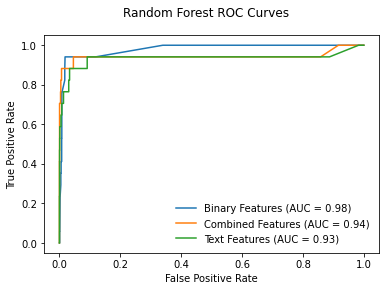

In [34]:
from sklearn.metrics import plot_roc_curve


plt.figure(figsize=(10,8))
RF1 = plot_roc_curve(rf1, x1_test, y1_test, name = "Binary Features")
RF2 = plot_roc_curve(rf2, x2_test, y2_test, ax = RF1.ax_ , name = "Combined Features")
RF3 = plot_roc_curve(rf3, x3_test, y3_test, ax = RF1.ax_, name = "Text Features")
RF1.figure_.suptitle("Random Forest ROC Curves")
plt.legend(loc="lower right", frameon= False)
plt.savefig('RocCurve.eps', format='eps', bbox_inches = 'tight')

In [35]:
# 2. XGBOOST

from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
xgclass = XGBClassifier(n_estimators=100, random_state=13)

In [36]:
# 5. XGBOOST
# Binary

xgclass = XGBClassifier
from imblearn.over_sampling import RandomOverSampler

example_params1 = {'max_depth':6, 'eta': 0.3, 'gamma': 0, 'n_estimators': 100}

params = {'max_depth': [3, 6, 10, 20], 'eta': [0.01,0.05,0.1, 0.3], 'gamma': np.arange(0, 10, 1), 'n_estimators': [50, 100, 150]}


def score_model(model, params, cv=None):
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTETomek(random_state=42)
    
    scores1 = []
    scores2 = []
    scores3 = []
    scores4 = []
    scores5 = []
    

    for train_fold_index, val_fold_index in cv.split(x1_train, y1_train):
        x_train_fold, x_val_fold = x1_train.iloc[train_fold_index], x1_train.iloc[val_fold_index]
        y_train_fold, y_val_fold = y1_train.iloc[train_fold_index], y1_train.iloc[val_fold_index]

        x_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(x_train_fold, y_train_fold)
        
        model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
        
        score1 = recall_score(y1_test, model_obj.predict(x1_test))
        score2 = precision_score(y1_test, model_obj.predict(x1_test))
        score3 = f1_score(y1_test, model_obj.predict(x1_test))
        score4 = roc_auc_score(y1_test, model_obj.predict(x1_test))
        score5 = accuracy_score(y1_test, model_obj.predict(x1_test))
          
        scores1.append(score1)
        scores2.append(score2)
        scores3.append(score3)
        scores4.append(score4)
        scores5.append(score5)
        
        dfxgclass1 = pd.DataFrame(scores1)
        dfxgclass2 = pd.DataFrame(scores2)
        dfxgclass3 = pd.DataFrame(scores3)
        dfxgclass4 = pd.DataFrame(scores4)
        dfxgclass5 = pd.DataFrame(scores5)
        
        dfxgclass11 = dfxgclass1.mean(axis=0)
        dfxgclass12 = dfxgclass2.mean(axis=0)
        dfxgclass13 = dfxgclass3.mean(axis=0)
        dfxgclass14 = dfxgclass4.mean(axis=0)
        dfxgclass15 = dfxgclass5.mean(axis=0)

    return dfxgclass11, dfxgclass12, dfxgclass13, dfxgclass14, dfxgclass15 

score_model(xgclass, example_params1, cv=kf)

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0    0.752941
 dtype: float64,
 0    0.092111
 dtype: float64,
 0    0.163661
 dtype: float64,
 0    0.846396
 dtype: float64,
 0    0.938391
 dtype: float64)

In [37]:
# 5. XGBOOST
# Text Features

xgclass = XGBClassifier
from imblearn.over_sampling import RandomOverSampler

example_params1 = {'max_depth':6, 'eta': 0.3, 'gamma': 0, 'n_estimators': 100}

params = {'max_depth': [3, 6, 10, 20], 'eta': [0.01,0.05,0.1, 0.3], 'gamma': np.arange(0, 10, 1), 'n_estimators': [50, 100, 150]}


def score_model(model, params, cv=None):
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTETomek(random_state=42)
    
    scores1 = []
    scores2 = []
    scores3 = []
    scores4 = []
    scores5 = []
    

    for train_fold_index, val_fold_index in cv.split(x3_train, y3_train):
        x_train_fold, x_val_fold = x3_train.iloc[train_fold_index], x3_train.iloc[val_fold_index]
        y_train_fold, y_val_fold = y3_train.iloc[train_fold_index], y3_train.iloc[val_fold_index]

        x_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(x_train_fold, y_train_fold)
        
        model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
        
        score1 = recall_score(y3_test, model_obj.predict(x3_test))
        score2 = precision_score(y3_test, model_obj.predict(x3_test))
        score3 = f1_score(y3_test, model_obj.predict(x3_test))
        score4 = roc_auc_score(y3_test, model_obj.predict(x3_test))
        score5 = accuracy_score(y3_test, model_obj.predict(x3_test))
          
        scores1.append(score1)
        scores2.append(score2)
        scores3.append(score3)
        scores4.append(score4)
        scores5.append(score5)
        
        dfxgclass1 = pd.DataFrame(scores1)
        dfxgclass2 = pd.DataFrame(scores2)
        dfxgclass3 = pd.DataFrame(scores3)
        dfxgclass4 = pd.DataFrame(scores4)
        dfxgclass5 = pd.DataFrame(scores5)
        
        dfxgclass11 = dfxgclass1.mean(axis=0)
        dfxgclass12 = dfxgclass2.mean(axis=0)
        dfxgclass13 = dfxgclass3.mean(axis=0)
        dfxgclass14 = dfxgclass4.mean(axis=0)
        dfxgclass15 = dfxgclass5.mean(axis=0)

    return dfxgclass11, dfxgclass12, dfxgclass13, dfxgclass14, dfxgclass15 

score_model(xgclass, example_params1, cv=kf)

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0    0.623529
 dtype: float64,
 0    0.713936
 dtype: float64,
 0    0.663042
 dtype: float64,
 0    0.810745
 dtype: float64,
 0    0.995034
 dtype: float64)

In [38]:
# 5. XGBOOST
# Combined Features

xgclass = XGBClassifier
from imblearn.over_sampling import RandomOverSampler

example_params1 = {'max_depth':6, 'eta': 0.3, 'gamma': 0, 'n_estimators': 100}

params = {'max_depth': [3, 6, 10, 20], 'eta': [0.01,0.05,0.1, 0.3], 'gamma': np.arange(0, 10, 1), 'n_estimators': [50, 100, 150]}


def score_model(model, params, cv=None):
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTETomek(random_state=42)
    
    scores1 = []
    scores2 = []
    scores3 = []
    scores4 = []
    scores5 = []
    

    for train_fold_index, val_fold_index in cv.split(x2_train, y2_train):
        x_train_fold, x_val_fold = x2_train.iloc[train_fold_index], x2_train.iloc[val_fold_index]
        y_train_fold, y_val_fold = y2_train.iloc[train_fold_index], y2_train.iloc[val_fold_index]

        x_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(x_train_fold, y_train_fold)
        
        model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
        
        score1 = recall_score(y2_test, model_obj.predict(x2_test))
        score2 = precision_score(y2_test, model_obj.predict(x2_test))
        score3 = f1_score(y2_test, model_obj.predict(x2_test))
        score4 = roc_auc_score(y2_test, model_obj.predict(x2_test))
        score5 = accuracy_score(y2_test, model_obj.predict(x2_test))
          
        scores1.append(score1)
        scores2.append(score2)
        scores3.append(score3)
        scores4.append(score4)
        scores5.append(score5)
        
        dfxgclass1 = pd.DataFrame(scores1)
        dfxgclass2 = pd.DataFrame(scores2)
        dfxgclass3 = pd.DataFrame(scores3)
        dfxgclass4 = pd.DataFrame(scores4)
        dfxgclass5 = pd.DataFrame(scores5)
        
        dfxgclass11 = dfxgclass1.mean(axis=0)
        dfxgclass12 = dfxgclass2.mean(axis=0)
        dfxgclass13 = dfxgclass3.mean(axis=0)
        dfxgclass14 = dfxgclass4.mean(axis=0)
        dfxgclass15 = dfxgclass5.mean(axis=0)

    return dfxgclass11, dfxgclass12, dfxgclass13, dfxgclass14, dfxgclass15 

score_model(xgclass, example_params1, cv=kf)

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0    0.8
 dtype: float64,
 0    0.714753
 dtype: float64,
 0    0.750969
 dtype: float64,
 0    0.898703
 dtype: float64,
 0    0.995862
 dtype: float64)

In [39]:
# How it compares to the test data

x_train_upsample, y_train_upsample = SMOTETomek(random_state=42).fit_sample(x1_train, y1_train)

xgclass1 = XGBClassifier(max_depth =6, eta = 0.3,  gamma = 0, n_estimators = 50)
xgclass1.fit(x_train_upsample, y_train_upsample)

recalltest = recall_score(y1_test, xgclass1.predict(x1_test))
precisiontest = precision_score(y1_test, xgclass1.predict(x1_test))
f1test = f1_score(y1_test, xgclass1.predict(x1_test))
roc_auctest = roc_auc_score(y1_test, xgclass1.predict(x1_test))
accuracytest = accuracy_score(y1_test, xgclass1.predict(x1_test))

recalltest, precisiontest, f1test, roc_auctest, accuracytest

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0.7647058823529411,
 0.09352517985611511,
 0.16666666666666669,
 0.8531592433080739,
 0.9402298850574713)

In [40]:
# How it compares to the test data

x_train_upsample, y_train_upsample = SMOTETomek(random_state=42).fit_sample(x3_train, y3_train)

xgclass3 = XGBClassifier(max_depth = 6, eta = 0.3,  gamma = 0, n_estimators = 50)
xgclass3.fit(x_train_upsample, y_train_upsample)

recalltest = recall_score(y3_test, xgclass3.predict(x3_test))
precisiontest = precision_score(y3_test, xgclass3.predict(x3_test))
f1test = f1_score(y3_test, xgclass3.predict(x3_test))
roc_auctest = roc_auc_score(y3_test, xgclass3.predict(x3_test))
accuracytest = accuracy_score(y3_test, xgclass3.predict(x3_test))

recalltest, precisiontest, f1test, roc_auctest, accuracytest

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0.7058823529411765,
 0.6666666666666666,
 0.6857142857142857,
 0.851551000381617,
 0.9949425287356322)

In [41]:
# How it compares to the test data

x_train_upsample, y_train_upsample = SMOTETomek(random_state=42).fit_sample(x2_train, y2_train)

xgclass2 = XGBClassifier(max_depth =6, eta = 0.3,  gamma = 0, n_estimators = 50)
xgclass2.fit(x_train_upsample, y_train_upsample)

recalltest = recall_score(y2_test, xgclass2.predict(x2_test))
precisiontest = precision_score(y2_test, xgclass2.predict(x2_test))
f1test = f1_score(y2_test, xgclass2.predict(x2_test))
roc_auctest = roc_auc_score(y2_test, xgclass2.predict(x2_test))
accuracytest = accuracy_score(y2_test, xgclass2.predict(x2_test))

recalltest, precisiontest, f1test, roc_auctest, accuracytest

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0.8235294117647058,
 0.7,
 0.7567567567567567,
 0.9103745297933815,
 0.9958620689655172)

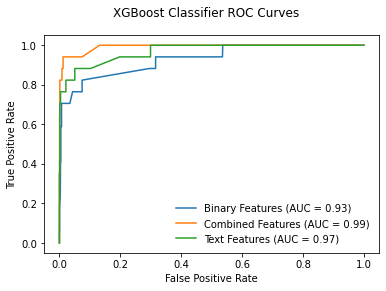

In [42]:
from sklearn.metrics import plot_roc_curve
XGB1 = plot_roc_curve(xgclass1, x1_test, y1_test, name = "Binary Features")
XGB2 = plot_roc_curve(xgclass2, x2_test, y2_test, ax = XGB1.ax_ , name = "Combined Features")
XGB3 = plot_roc_curve(xgclass3, x3_test, y3_test, ax = XGB1.ax_, name = "Text Features")
XGB1.figure_.suptitle("XGBoost Classifier ROC Curves")

plt.legend(loc="lower right", frameon= False)
plt.savefig('XGB1RocCurve.eps', format='eps', bbox_inches = 'tight')

In [43]:
# 3. Logistic Regression
# Binary

logreg = LogisticRegression
example_params2 = {'C':1.0, 'n_jobs':1, 'penalty':'l2', 'max_iter':2000}


# Evaluate model
def score_model(model, params, cv=None):
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTETomek(random_state=42)
    
    scores1 = []
    scores2 = []
    scores3 = []
    scores4 = []
    scores5 = []
    

    for train_fold_index, val_fold_index in cv.split(x1_train, y1_train):
        x_train_fold, x_val_fold = x1_train.iloc[train_fold_index], x1_train.iloc[val_fold_index]
        y_train_fold, y_val_fold = y1_train.iloc[train_fold_index], y1_train.iloc[val_fold_index]

        x_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(x_train_fold, y_train_fold)
        
        model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
        
        score1 = recall_score(y1_test, model_obj.predict(x1_test))
        score2 = precision_score(y1_test, model_obj.predict(x1_test))
        score3 = f1_score(y1_test, model_obj.predict(x1_test))
        score4 = roc_auc_score(y1_test, model_obj.predict(x1_test))
        score5 = accuracy_score(y1_test, model_obj.predict(x1_test))
          
        scores1.append(score1)
        scores2.append(score2)
        scores3.append(score3)
        scores4.append(score4)
        scores5.append(score5)
        
        dflogreg1 = pd.DataFrame(scores1)
        dflogreg2 = pd.DataFrame(scores2)
        dflogreg3 = pd.DataFrame(scores3)
        dflogreg4 = pd.DataFrame(scores4)
        dflogreg5 = pd.DataFrame(scores5)
        
        dflogreg11 = dflogreg1.mean(axis=0)
        dflogreg12 = dflogreg2.mean(axis=0)
        dflogreg13 = dflogreg3.mean(axis=0)
        dflogreg14 = dflogreg4.mean(axis=0)
        dflogreg15 = dflogreg5.mean(axis=0)

    return dflogreg11, dflogreg12, dflogreg13, dflogreg14, dflogreg15

score_model(logreg, example_params2, cv=kf)

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0    0.847059
 dtype: float64,
 0    0.211004
 dtype: float64,
 0    0.319922
 dtype: float64,
 0    0.905781
 dtype: float64,
 0    0.963586
 dtype: float64)

In [44]:
# 3. Logistic Regression
# Text Features

logreg = LogisticRegression
example_params2 = {'C':1.0, 'n_jobs':1, 'penalty':'l2', 'max_iter':2000}


# Evaluate model
def score_model(model, params, cv=None):
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTETomek(random_state=42)
    
    scores1 = []
    scores2 = []
    scores3 = []
    scores4 = []
    scores5 = []
    

    for train_fold_index, val_fold_index in cv.split(x3_train, y3_train):
        x_train_fold, x_val_fold = x3_train.iloc[train_fold_index], x3_train.iloc[val_fold_index]
        y_train_fold, y_val_fold = y3_train.iloc[train_fold_index], y3_train.iloc[val_fold_index]

        x_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(x_train_fold, y_train_fold)
        
        model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
        
        score1 = recall_score(y3_test, model_obj.predict(x3_test))
        score2 = precision_score(y3_test, model_obj.predict(x3_test))
        score3 = f1_score(y3_test, model_obj.predict(x3_test))
        score4 = roc_auc_score(y3_test, model_obj.predict(x3_test))
        score5 = accuracy_score(y3_test, model_obj.predict(x3_test))
          
        scores1.append(score1)
        scores2.append(score2)
        scores3.append(score3)
        scores4.append(score4)
        scores5.append(score5)
        
        dflogreg1 = pd.DataFrame(scores1)
        dflogreg2 = pd.DataFrame(scores2)
        dflogreg3 = pd.DataFrame(scores3)
        dflogreg4 = pd.DataFrame(scores4)
        dflogreg5 = pd.DataFrame(scores5)
        
        dflogreg11 = dflogreg1.mean(axis=0)
        dflogreg12 = dflogreg2.mean(axis=0)
        dflogreg13 = dflogreg3.mean(axis=0)
        dflogreg14 = dflogreg4.mean(axis=0)
        dflogreg15 = dflogreg5.mean(axis=0)

    return dflogreg11, dflogreg12, dflogreg13, dflogreg14, dflogreg15

score_model(logreg, example_params2, cv=kf)

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0    0.764706
 dtype: float64,
 0    0.285627
 dtype: float64,
 0    0.412748
 dtype: float64,
 0    0.874568
 dtype: float64,
 0    0.982713
 dtype: float64)

In [45]:
# 3. Logistic Regression
# Combined Features

logreg = LogisticRegression
example_params2 = {'C':1.0, 'n_jobs':1, 'penalty':'l2', 'max_iter':2000}


# Evaluate model
def score_model(model, params, cv=None):
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTETomek(random_state=42)
    
    scores1 = []
    scores2 = []
    scores3 = []
    scores4 = []
    scores5 = []
    

    for train_fold_index, val_fold_index in cv.split(x2_train, y2_train):
        x_train_fold, x_val_fold = x2_train.iloc[train_fold_index], x2_train.iloc[val_fold_index]
        y_train_fold, y_val_fold = y2_train.iloc[train_fold_index], y2_train.iloc[val_fold_index]

        x_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(x_train_fold, y_train_fold)
        
        model_obj = model(**params).fit(x_train_fold_upsample, y_train_fold_upsample)
        
        score1 = recall_score(y2_test, model_obj.predict(x2_test))
        score2 = precision_score(y2_test, model_obj.predict(x2_test))
        score3 = f1_score(y2_test, model_obj.predict(x2_test))
        score4 = roc_auc_score(y2_test, model_obj.predict(x2_test))
        score5 = accuracy_score(y2_test, model_obj.predict(x2_test))
          
        scores1.append(score1)
        scores2.append(score2)
        scores3.append(score3)
        scores4.append(score4)
        scores5.append(score5)
        
        dflogreg1 = pd.DataFrame(scores1)
        dflogreg2 = pd.DataFrame(scores2)
        dflogreg3 = pd.DataFrame(scores3)
        dflogreg4 = pd.DataFrame(scores4)
        dflogreg5 = pd.DataFrame(scores5)
        
        dflogreg11 = dflogreg1.mean(axis=0)
        dflogreg12 = dflogreg2.mean(axis=0)
        dflogreg13 = dflogreg3.mean(axis=0)
        dflogreg14 = dflogreg4.mean(axis=0)
        dflogreg15 = dflogreg5.mean(axis=0)

    return dflogreg11, dflogreg12, dflogreg13, dflogreg14, dflogreg15

score_model(logreg, example_params2, cv=kf)

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0    0.788235
 dtype: float64,
 0    0.409775
 dtype: float64,
 0    0.5364
 dtype: float64,
 0    0.88953
 dtype: float64,
 0    0.989241
 dtype: float64)

In [46]:
# Lets see how it compares to the test data

x_train_upsample, y_train_upsample = SMOTETomek(random_state=42).fit_sample(x1_train, y1_train)

logreg1 = LogisticRegression(C = 1.0, n_jobs = 1, penalty = 'l2', max_iter = 2000)
logreg1.fit(x_train_upsample, y_train_upsample)

recalltest = recall_score(y1_test, logreg1.predict(x1_test))
precisiontest = precision_score(y1_test, logreg1.predict(x1_test))
f1test = f1_score(y1_test, logreg1.predict(x1_test))
roc_auctest = roc_auc_score(y1_test, logreg1.predict(x1_test))
accuracytest = accuracy_score(y1_test, logreg1.predict(x1_test))

recalltest, precisiontest, f1test, roc_auctest, accuracytest

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0.8823529411764706,
 0.14018691588785046,
 0.24193548387096775,
 0.9198604372240091,
 0.9567816091954023)

In [47]:
# Lets see how it compares to the test data

x_train_upsample, y_train_upsample = SMOTETomek(random_state=42).fit_sample(x2_train, y2_train)

logreg2 = LogisticRegression(C = 1.0, n_jobs = 1, penalty = 'l2', max_iter = 2000)
logreg2.fit(x_train_upsample, y_train_upsample)

recalltest = recall_score(y2_test, logreg2.predict(x2_test))
precisiontest = precision_score(y2_test, logreg2.predict(x2_test))
f1test = f1_score(y2_test, logreg2.predict(x2_test))
roc_auctest = roc_auc_score(y2_test, logreg2.predict(x2_test))
accuracytest = accuracy_score(y2_test, logreg2.predict(x2_test))

recalltest, precisiontest, f1test, roc_auctest, accuracytest

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0.8235294117647058,
 0.3181818181818182,
 0.45901639344262296,
 0.9048138254374966,
 0.9848275862068966)

In [48]:
# Lets see how it compares to the test data

x_train_upsample, y_train_upsample = SMOTETomek(random_state=42).fit_sample(x3_train, y3_train)

logreg3 = LogisticRegression(C = 1.0, n_jobs = 1, penalty = 'l2', max_iter = 2000)
logreg3.fit(x_train_upsample, y_train_upsample)

recalltest = recall_score(y3_test, logreg3.predict(x3_test))
precisiontest = precision_score(y3_test, logreg3.predict(x3_test))
f1test = f1_score(y1_test, logreg3.predict(x3_test))
roc_auctest = roc_auc_score(y3_test, logreg3.predict(x3_test))
accuracytest = accuracy_score(y3_test, logreg3.predict(x3_test))

recalltest, precisiontest, f1test, roc_auctest, accuracytest

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(0.8823529411764706,
 0.3,
 0.44776119402985076,
 0.9330671100692361,
 0.9829885057471265)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 576x360 with 0 Axes>

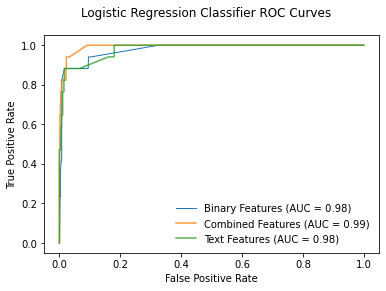

In [49]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 5))

fig, ax = plt.subplots()

log1 = plot_roc_curve(logreg1, x1_test, y1_test,  name = "Binary Features", lw=1, ax=ax)
log2 = plot_roc_curve(logreg2, x2_test, y2_test, ax = log1.ax_ , alpha=1.8, name = "Combined Features")
log3 = plot_roc_curve(logreg3, x3_test, y3_test, ax = log1.ax_, alpha=1.8, name = "Text Features")
log1.figure_.suptitle("Logistic Regression Classifier ROC Curves")

plt.legend(loc="lower right", frameon= False)
plt.savefig('logRocCurve.eps', format='eps', bbox_inches = 'tight')

In [50]:
# Neural Network
np.random.seed(0)

number_of_features= 9

#Create function returning a compiled network
def create_network1():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [51]:
# Wrap Keras model so it can be used by scikit-learn


from keras.wrappers.scikit_learn import KerasClassifier
neural_network1 = KerasClassifier(build_fn=create_network1, epochs=10, batch_size=100, verbose=0)

# neural_network._estimator_type = "classifier"
# x_train, x_test, y_train, y_test = train_test_split(x5, y1, random_state=45)

# Evaluate neural network using 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)

example_params3 = {'batch_size':10, 'epochs':100}

params = {'batch_size': [10, 20, 40, 60, 80], 'epochs': [10, 20, 50, 100]}

# Evaluate model
def score_model(model, params, cv=None):
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTETomek(random_state=42)
    
    scores1 = []
    scores2 = []
    scores3 = []
    scores4 = []
    scores5 = []
    

    for train_fold_index, val_fold_index in cv.split(x1_train, y1_train):
        x_train_fold, x_val_fold = x1_train.iloc[train_fold_index], x1_train.iloc[val_fold_index]
        y_train_fold, y_val_fold = y1_train.iloc[train_fold_index], y1_train.iloc[val_fold_index]

        x_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(x_train_fold, y_train_fold)
        
        model_obj = model.fit(x_train_fold_upsample, y_train_fold_upsample)
        
        score1 = recall_score(y1_test, model.predict(x1_test))
        score2 = precision_score(y1_test, model.predict(x1_test))
        score3 = f1_score(y1_test, model.predict(x1_test))
        score4 = roc_auc_score(y1_test, model.predict(x1_test))
        score5 = accuracy_score(y1_test, model.predict(x1_test))
          
        scores1.append(score1)
        scores2.append(score2)
        scores3.append(score3)
        scores4.append(score4)
        scores5.append(score5)
        
        dfnn1 = pd.DataFrame(scores1)
        dfnn2 = pd.DataFrame(scores2)
        dfnn3 = pd.DataFrame(scores3)
        dfnn4 = pd.DataFrame(scores4)
        dfnn5 = pd.DataFrame(scores5)
        
        dfnn11 = dfnn1.mean(axis=0)
        dfnn12 = dfnn2.mean(axis=0)
        dfnn13 = dfnn3.mean(axis=0)
        dfnn14 = dfnn4.mean(axis=0)
        dfnn15 = dfnn5.mean(axis=0)

    return dfnn11, dfnn12, dfnn13, dfnn14, dfnn15

score_model(neural_network1, example_params3, cv=kf)

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(0    0.776471
 dtype: float64,
 0    0.109998
 dtype: float64,
 0    0.191835
 dtype: float64,
 0    0.862471
 dtype: float64,
 0    0.947126
 dtype: float64)

In [52]:
# Lets see how it compares to the test data

x_train_upsample, y_train_upsample = SMOTETomek(random_state=42).fit_sample(x1_train, y1_train)
neural_network1 = KerasClassifier(build_fn=create_network1, epochs=10, batch_size=100, verbose=0)
neural_network1._estimator_type = "classifier"

neural_network1.fit(x_train_upsample, y_train_upsample)
recalltest = recall_score(y1_test, neural_network1.predict(x1_test))
precisiontest = precision_score(y1_test, neural_network1.predict(x1_test))
f1test = f1_score(y1_test, neural_network1.predict(x1_test))
roc_auctest = roc_auc_score(y1_test, neural_network1.predict(x1_test))
accuracytest = accuracy_score(y1_test, neural_network1.predict(x1_test))

recalltest, precisiontest, f1test, roc_auctest, accuracytest

(0.7058823529411765,
 0.10526315789473684,
 0.18320610687022898,
 0.8293081829580767,
 0.9508045977011494)

In [53]:
# Neural Network
np.random.seed(0)

number_of_features= 109

#Create function returning a compiled network
def create_network2():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [54]:
# Wrap Keras model so it can be used by scikit-learn


from keras.wrappers.scikit_learn import KerasClassifier
neural_network2 = KerasClassifier(build_fn=create_network2, epochs=10, batch_size=100, verbose=0)

# neural_network._estimator_type = "classifier"
# x_train, x_test, y_train, y_test = train_test_split(x5, y1, random_state=45)

# Evaluate neural network using 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)

example_params3 = {'batch_size':10, 'epochs':100}

params = {'batch_size': [10, 20, 40, 60, 80], 'epochs': [10, 20, 50, 100]}

# Evaluate model
def score_model(model, params, cv=None):
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTETomek(random_state=42)
    
    scores1 = []
    scores2 = []
    scores3 = []
    scores4 = []
    scores5 = []
    

    for train_fold_index, val_fold_index in cv.split(x2_train, y2_train):
        x_train_fold, x_val_fold = x2_train.iloc[train_fold_index], x2_train.iloc[val_fold_index]
        y_train_fold, y_val_fold = y2_train.iloc[train_fold_index], y2_train.iloc[val_fold_index]

        x_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(x_train_fold, y_train_fold)
        
        model_obj = model.fit(x_train_fold_upsample, y_train_fold_upsample)
        
        score1 = recall_score(y2_test, model.predict(x2_test))
        score2 = precision_score(y2_test, model.predict(x2_test))
        score3 = f1_score(y2_test, model.predict(x2_test))
        score4 = roc_auc_score(y2_test, model.predict(x2_test))
        score5 = accuracy_score(y2_test, model.predict(x2_test))
          
        scores1.append(score1)
        scores2.append(score2)
        scores3.append(score3)
        scores4.append(score4)
        scores5.append(score5)
        
        dfnn1 = pd.DataFrame(scores1)
        dfnn2 = pd.DataFrame(scores2)
        dfnn3 = pd.DataFrame(scores3)
        dfnn4 = pd.DataFrame(scores4)
        dfnn5 = pd.DataFrame(scores5)
        
        dfnn11 = dfnn1.mean(axis=0)
        dfnn12 = dfnn2.mean(axis=0)
        dfnn13 = dfnn3.mean(axis=0)
        dfnn14 = dfnn4.mean(axis=0)
        dfnn15 = dfnn5.mean(axis=0)

    return dfnn11, dfnn12, dfnn13, dfnn14, dfnn15

score_model(neural_network2, example_params3, cv=kf)

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


(0    0.623529
 dtype: float64,
 0    0.591537
 dtype: float64,
 0    0.598085
 dtype: float64,
 0    0.809957
 dtype: float64,
 0    0.993471
 dtype: float64)

In [55]:
# Lets see how it compares to the test data

x_train_upsample, y_train_upsample = SMOTETomek(random_state=42).fit_sample(x2_train, y2_train)
neural_network2 = KerasClassifier(build_fn=create_network2, epochs=10, batch_size=100, verbose=0)
neural_network2._estimator_type = "classifier"


neural_network2.fit(x_train_upsample, y_train_upsample)
recalltest = recall_score(y2_test, neural_network2.predict(x2_test))
precisiontest = precision_score(y2_test, neural_network2.predict(x2_test))
f1test = f1_score(y2_test, neural_network2.predict(x2_test))
roc_auctest = roc_auc_score(y2_test, neural_network2.predict(x2_test))
accuracytest = accuracy_score(y2_test, neural_network2.predict(x2_test))

recalltest, precisiontest, f1test, roc_auctest, accuracytest

(0.7647058823529411,
 0.6842105263157895,
 0.7222222222222222,
 0.8809627650874993,
 0.9954022988505747)

In [56]:
# Neural Network
np.random.seed(0)

number_of_features= 100

#Create function returning a compiled network
def create_network3():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(number_of_features,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [57]:
# Wrap Keras model so it can be used by scikit-learn


from keras.wrappers.scikit_learn import KerasClassifier
neural_network3 = KerasClassifier(build_fn=create_network3, epochs=10, batch_size=100, verbose=0)

# neural_network._estimator_type = "classifier"
# x_train, x_test, y_train, y_test = train_test_split(x5, y1, random_state=45)

# Evaluate neural network using 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=False)

example_params3 = {'batch_size':10, 'epochs':100}

params = {'batch_size': [10, 20, 40, 60, 80], 'epochs': [10, 20, 50, 100]}

# Evaluate model
def score_model(model, params, cv=None):
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTETomek(random_state=42)
    
    scores1 = []
    scores2 = []
    scores3 = []
    scores4 = []
    scores5 = []
    

    for train_fold_index, val_fold_index in cv.split(x3_train, y3_train):
        x_train_fold, x_val_fold = x3_train.iloc[train_fold_index], x3_train.iloc[val_fold_index]
        y_train_fold, y_val_fold = y3_train.iloc[train_fold_index], y3_train.iloc[val_fold_index]

        x_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(x_train_fold, y_train_fold)
        
        model_obj = model.fit(x_train_fold_upsample, y_train_fold_upsample)
        
        score1 = recall_score(y3_test, model.predict(x3_test))
        score2 = precision_score(y3_test, model.predict(x3_test))
        score3 = f1_score(y3_test, model.predict(x3_test))
        score4 = roc_auc_score(y3_test, model.predict(x3_test))
        score5 = accuracy_score(y3_test, model.predict(x3_test))
          
        scores1.append(score1)
        scores2.append(score2)
        scores3.append(score3)
        scores4.append(score4)
        scores5.append(score5)
        
        dfnn1 = pd.DataFrame(scores1)
        dfnn2 = pd.DataFrame(scores2)
        dfnn3 = pd.DataFrame(scores3)
        dfnn4 = pd.DataFrame(scores4)
        dfnn5 = pd.DataFrame(scores5)
        
        dfnn11 = dfnn1.mean(axis=0)
        dfnn12 = dfnn2.mean(axis=0)
        dfnn13 = dfnn3.mean(axis=0)
        dfnn14 = dfnn4.mean(axis=0)
        dfnn15 = dfnn5.mean(axis=0)

    return dfnn11, dfnn12, dfnn13, dfnn14, dfnn15

score_model(neural_network3, example_params3, cv=kf)

C:\Users\AHF\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


(0    0.552941
 dtype: float64,
 0    0.578584
 dtype: float64,
 0    0.55604
 dtype: float64,
 0    0.774802
 dtype: float64,
 0    0.993195
 dtype: float64)

In [58]:
# Lets see how it compares to the test data

x_train_upsample, y_train_upsample = SMOTETomek(random_state=42).fit_sample(x3_train, y3_train)
neural_network3 = KerasClassifier(build_fn=create_network3, epochs=10, batch_size=100, verbose=0)
neural_network3._estimator_type = "classifier"

neural_network3.fit(x_train_upsample, y_train_upsample)
recalltest = recall_score(y3_test, neural_network3.predict(x3_test))
precisiontest = precision_score(y3_test, neural_network3.predict(x3_test))
f1test = f1_score(y3_test, neural_network3.predict(x3_test))
roc_auctest = roc_auc_score(y3_test, neural_network3.predict(x3_test))
accuracytest = accuracy_score(y3_test, neural_network3.predict(x3_test))

recalltest, precisiontest, f1test, roc_auctest, accuracytest

(0.5882352941176471,
 0.5263157894736842,
 0.5555555555555555,
 0.7920323829253667,
 0.9926436781609196)

Instructions for updating:
Please use `model.predict()` instead.


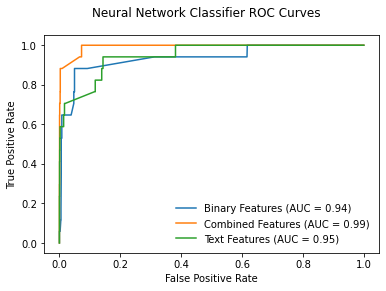

In [59]:
from sklearn.metrics import plot_roc_curve
NN1 = plot_roc_curve(neural_network1, x1_test, y1_test, name = "Binary Features")
NN2 = plot_roc_curve(neural_network2, x2_test, y2_test, ax = NN1.ax_ , name = "Combined Features")
NN3 = plot_roc_curve(neural_network3, x3_test, y3_test, ax = NN1.ax_, name = "Text Features")
NN1.figure_.suptitle("Neural Network Classifier ROC Curves")

plt.legend(loc="lower right", frameon= False)
plt.savefig('NNRocCurve.eps', format='eps', bbox_inches = 'tight')